In [1]:
import pandas as pd
import os
import glob
from datetime import datetime, date, time

# Tämä funktio on hyvä siirtää erilliseen python-tiedostoon, esim. read_data.py ja importata se sitten jupyter notebookiin
# import read_data as rd
# samaa toteutusperiaatetta voi käyttää sitten laajemminkin projektissa, eli kirjoittakaa toiminnalliset funktiot erillisiin python-moduleihin?

def read_csv_raw(filename):
    print("handling", filename)
    df = pd.read_csv(filename, 
                  sep=",", 
                  header=0,
                  index_col=['timestamp'],
                  parse_dates=['timestamp'])
    print("found", df.shape[0], "lines")
    return df

In [2]:
node3200 = read_csv_raw("./data/node3200.kevennetty.csv")


handling ./data/node3200.kevennetty.csv
found 100000 lines


In [3]:
# väliedoitinti datasetin koon kutistamiseksi - jätä esimerkiksi tähän :)
#_df = node3200[500000:600000]
#_df.to_csv("./data/node3200.kevennetty.csv")

# Piirrä datasta muutama rivi karttapohjaan

In [4]:
# %matplotlib inline
from PIL import Image, ImageDraw
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output

def draw(df):
    # Get image size with this method
    img = Image.open('./kauppa.jpg')
    width, height = img.size
    print(img.size)


    # Create image widget
    file = open("./kauppa.jpg", "rb")
    image = file.read()
    widgets.Image(
        value=image,
        format='png',
        width=width,
        height=height,
    )

    # Draw on image
    d = ImageDraw.Draw(img)

    # Calibration of coordinates
    x_offset = 112  # x offset
    y_offset = 27   # y offset
    x_max = 1076;  # node_x_max = 10406
    y_max = 563;  # node_y_max = 5220
    x_scale = 1166/10406
    y_scale = 563/5220


    def scale_coords(x,y,z):
        xr = (x*x_scale)+x_offset
        yr = (y*y_scale)+y_offset
        zr = 0
        return xr, yr, zr

    for index, row in df.iterrows():
        (x,y,z) = scale_coords(row.x, row.y, row.z)
        #d.point((x,y), fill=(255,100,100,255))#, outline ="green")
        d.rectangle((x,y,x+2,y+2), fill=(int(row.node_id)%255,0,0,20))#, outline ="green")

    display(img)

def clear():
    clear_output(wait=True)


(1280, 617)


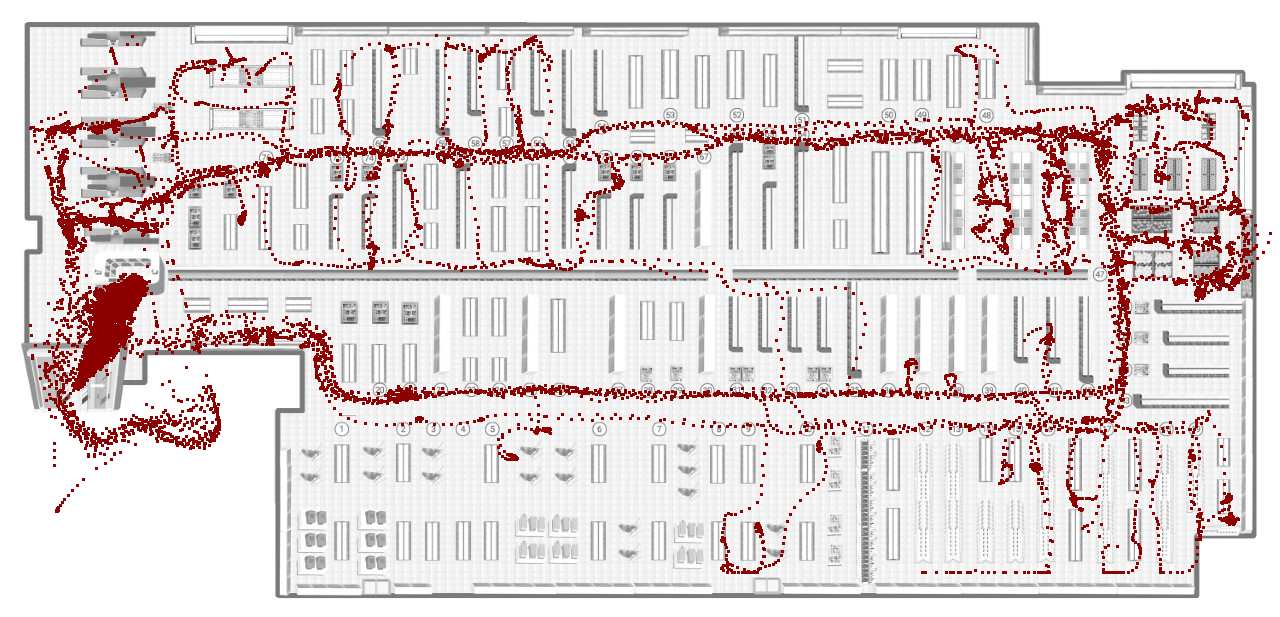

In [5]:
# Plottaa karttapohjaan draw()-funktion avulla
draw(node3200[:50000])